# Exp1 Simple ML model using iris on cloud

Test Accuracy: 1.0


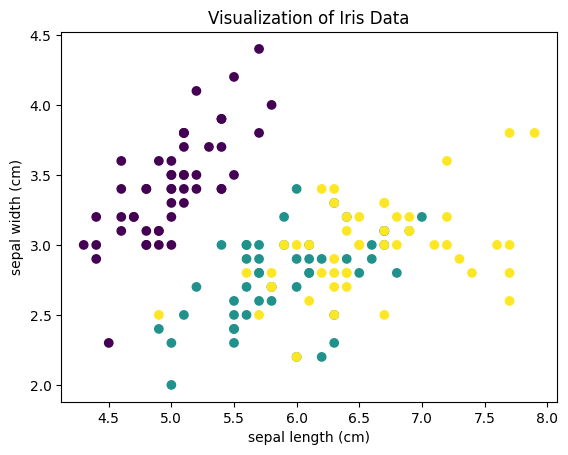

In [7]:
# prompt: Test Accuracy: 1.0
# Also vidualisde soem stuff

# # Exp1 Simple ML model using iris on cloud
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

# Visualize some data points (e.g., first two features)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Visualization of Iris Data")
plt.show()


# Exp2 Implement data preprocessing techniques

Iris Dataset Shape: (150, 5)

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Dataset with missing values (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                NaN               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1          

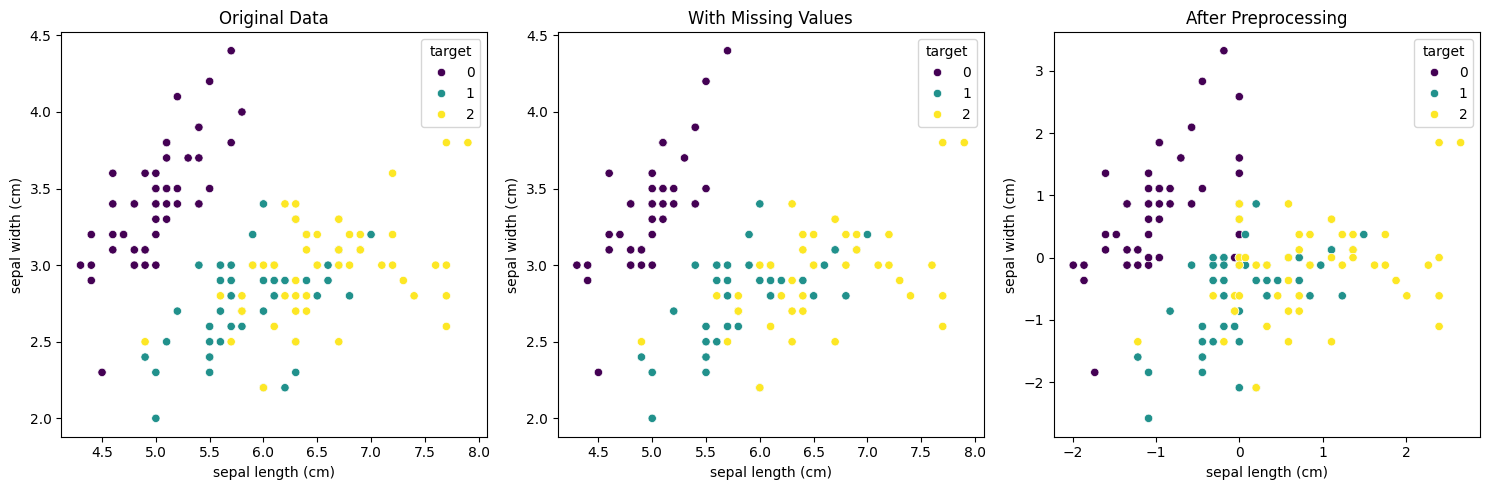


Preprocessing Steps Completed:
1. Loaded the Iris dataset
2. Added artificial missing values
3. Imputed missing values using mean strategy
4. Standardized features using StandardScaler
5. Split data into training and testing sets
6. Visualized the effects of preprocessing


In [3]:
# Basic Data Preprocessing with Scikit-Learn's Iris Dataset
# --------------------------------------------------------

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Print basic information about the dataset
print("Iris Dataset Shape:", iris_df.shape)
print("\nFirst 5 rows:")
print(iris_df.head())

# Create a copy with some missing values for demonstration
iris_missing = iris_df.copy()
np.random.seed(42)
for col in iris_missing.columns[:-1]:  # Skip the target column
    mask = np.random.random(len(iris_missing)) < 0.1  # 10% missing values
    iris_missing.loc[mask, col] = np.nan

print("\nDataset with missing values (first 5 rows):")
print(iris_missing.head())
print("\nMissing value count by column:")
print(iris_missing.isnull().sum())

# 1. Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
iris_imputed = pd.DataFrame(
    imputer.fit_transform(iris_missing.iloc[:, :-1]),
    columns=iris_missing.columns[:-1]
)
iris_imputed['target'] = iris_missing['target']

print("\nAfter imputation (first 5 rows):")
print(iris_imputed.head())

# 2. Scale the features using StandardScaler
scaler = StandardScaler()
iris_scaled = pd.DataFrame(
    scaler.fit_transform(iris_imputed.iloc[:, :-1]),
    columns=iris_imputed.columns[:-1]
)
iris_scaled['target'] = iris_imputed['target']

print("\nAfter scaling (first 5 rows):")
print(iris_scaled.head())

# 3. Split data into training and testing sets
X = iris_scaled.iloc[:, :-1]  # Features
y = iris_scaled['target']     # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# 4. Visualize the effect of preprocessing
plt.figure(figsize=(15, 5))

# Original data
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='target',
    data=iris_df,
    palette='viridis'
)
plt.title('Original Data')

# Data with missing values
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='target',
    data=iris_missing,
    palette='viridis'
)
plt.title('With Missing Values')

# Preprocessed data
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='target',
    data=iris_scaled,
    palette='viridis'
)
plt.title('After Preprocessing')

plt.tight_layout()
plt.show()

# Summary
print("\nPreprocessing Steps Completed:")
print("1. Loaded the Iris dataset")
print("2. Added artificial missing values")
print("3. Imputed missing values using mean strategy")
print("4. Standardized features using StandardScaler")
print("5. Split data into training and testing sets")
print("6. Visualized the effects of preprocessing")

# Exp3 Data Viz

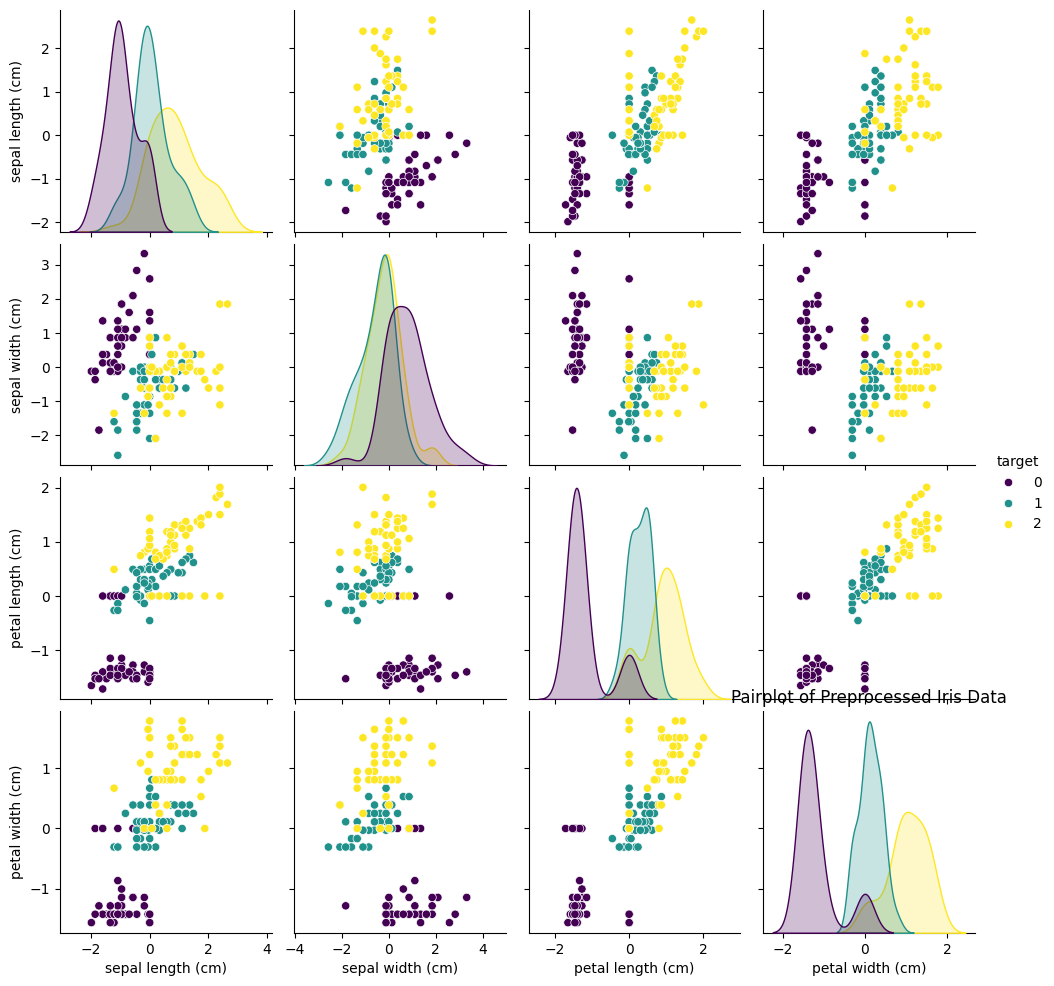

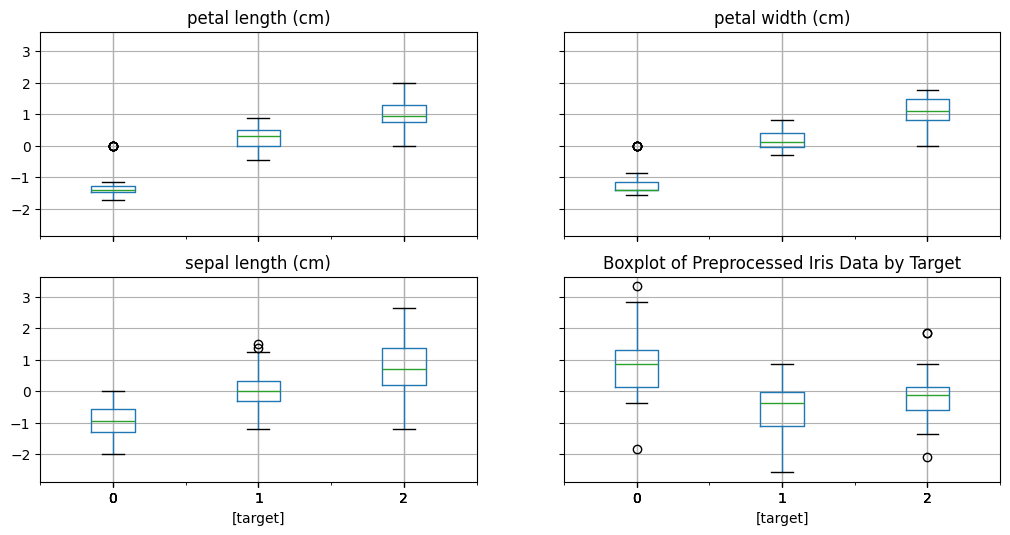

<ipython-input-4-ca529e254c88>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=iris_scaled, x='target', y='sepal length (cm)', palette='viridis')


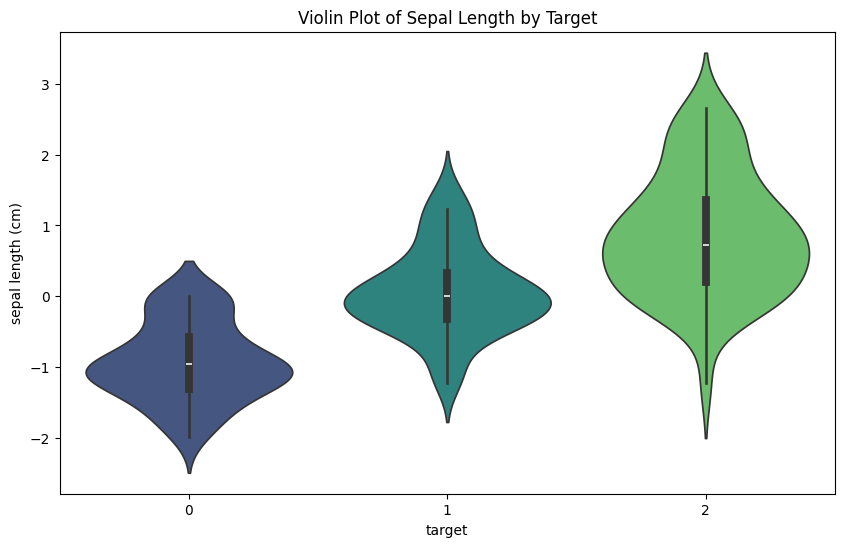

<ipython-input-4-ca529e254c88>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=iris_scaled, x='target', y='sepal width (cm)', palette='viridis')


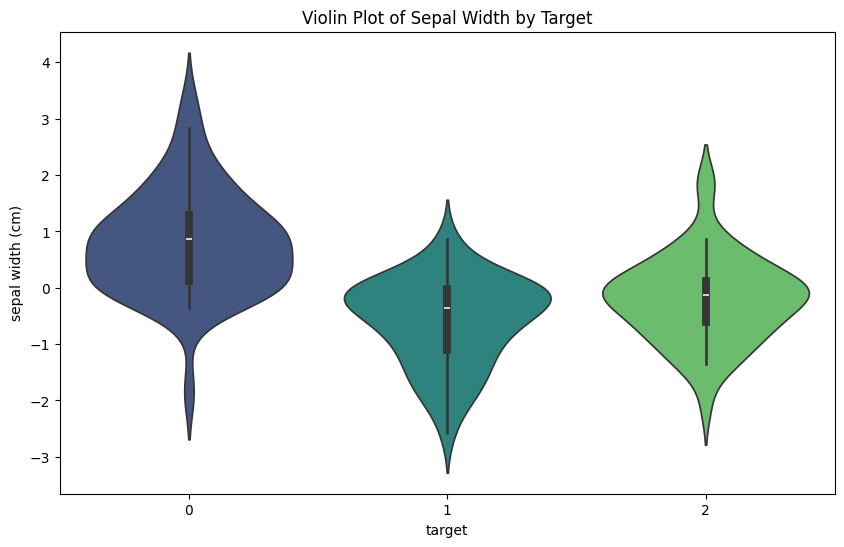

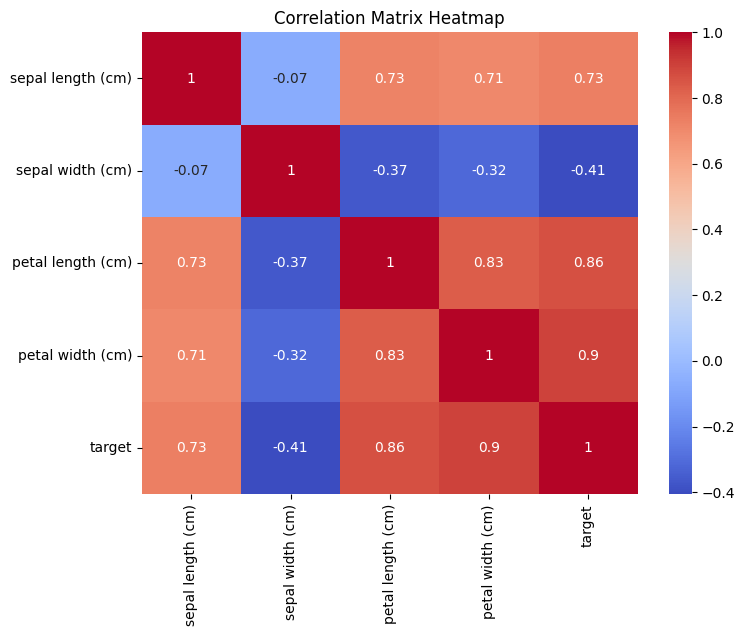

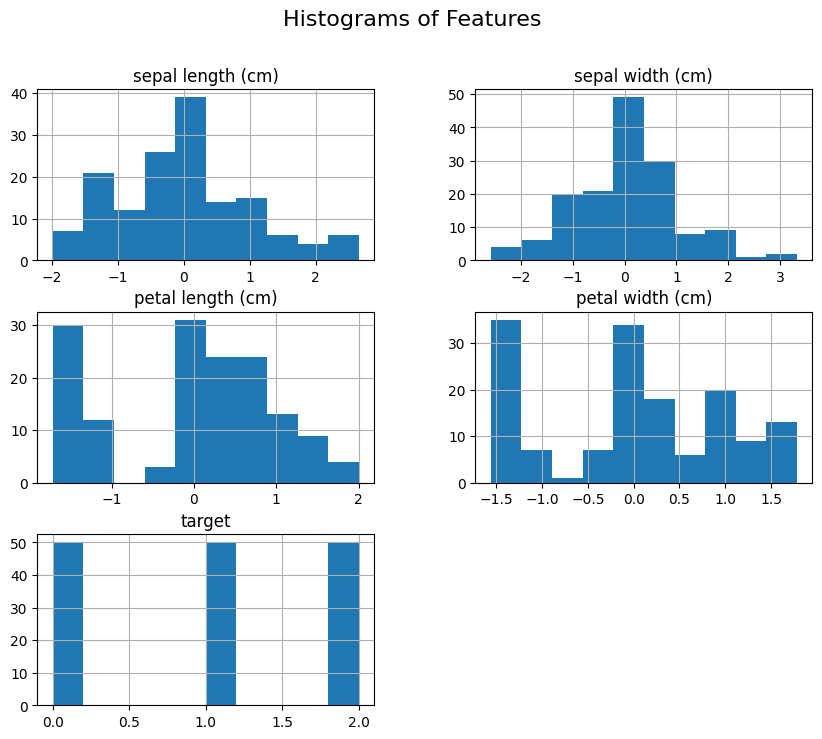

In [4]:
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(iris_scaled, hue='target', palette='viridis')
plt.title('Pairplot of Preprocessed Iris Data')
plt.show()

# Boxplot
iris_scaled.boxplot(by='target', figsize=(12, 6))
plt.title('Boxplot of Preprocessed Iris Data by Target')
plt.suptitle('') # Remove the default subplot title
plt.show()


# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=iris_scaled, x='target', y='sepal length (cm)', palette='viridis')
plt.title('Violin Plot of Sepal Length by Target')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=iris_scaled, x='target', y='sepal width (cm)', palette='viridis')
plt.title('Violin Plot of Sepal Width by Target')
plt.show()


# Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
correlation_matrix = iris_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Histogram for each feature
iris_scaled.hist(figsize=(10,8))
plt.suptitle("Histograms of Features", fontsize=16) #Main title
plt.show()


# Exp4 Image binary Classification basic using built in dataset

Accuracy: 1.00


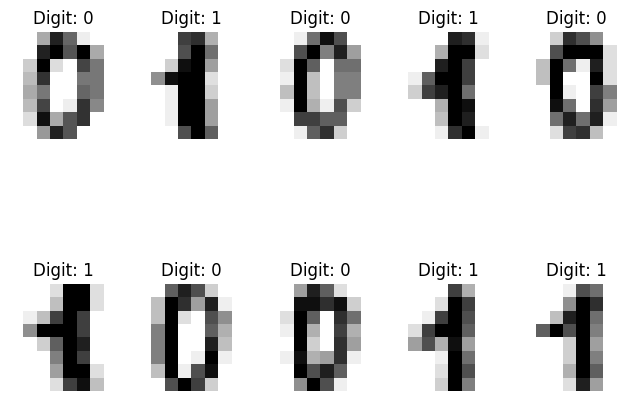

In [11]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Target variable is the digit (0-9)
X = digits.data
y = digits.target

# Limit to binary classification (0 or 1)
X_binary = X[y <= 1]  # Select only the data where the digit is 0 or 1
y_binary = y[y <= 1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize some examples of digits 0 and 1 (since it's binary classification)
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_binary[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f"Digit: {y_binary[i]}")
    plt.axis('off')
plt.show()


# Exp5 NLP basics with Built in stuff on colab

In [9]:
# Concise NLP Operations Demo
# --------------------------

# Essential imports
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Load a subset of the 20 Newsgroups dataset (just 2 categories for simplicity)
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups = fetch_20newsgroups(
    subset='all',
    categories=categories,
    shuffle=True,
    random_state=42,
    remove=('headers', 'footers', 'quotes')
)

# Quick dataset overview
print(f"Dataset: {len(newsgroups.data)} documents, {len(categories)} categories")
print(f"Sample text:\n{newsgroups.data[0][:300]}...\n")

# 2. Simple text preprocessing function
def basic_preprocess(text):
    # Convert to lowercase and remove punctuation/digits using a single comprehension
    return ' '.join(word.lower() for word in text.split()
                   if word.isalpha() and len(word) > 2)

# Process a sample
sample_processed = basic_preprocess(newsgroups.data[0])
print(f"After preprocessing:\n{sample_processed[:300]}...\n")

# 3. Text vectorization - TF-IDF
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf.fit_transform(newsgroups.data)
y = newsgroups.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training data: {X_train.shape}, Test data: {X_test.shape}")

# 4. Train a classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 5. Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=categories))

# 6. Feature importance - most distinctive words for each category
feature_names = np.array(tfidf.get_feature_names_out())

def show_top_features(classifier, feature_names, class_labels, n=10):
    for i, class_label in enumerate(class_labels):
        top_indices = np.argsort(classifier.feature_log_prob_[i])[-n:]
        top_features = feature_names[top_indices]
        print(f"\nTop {n} words for '{class_label}':")
        print(", ".join(top_features))

show_top_features(clf, feature_names, categories)

# 7. Classify a new document
new_docs = [
    "I believe in the power of faith and Jesus Christ as our savior.",
    "Religion has no scientific basis and relies on blind faith."
]

# Vectorize and predict
new_docs_tfidf = tfidf.transform(new_docs)
predictions = clf.predict(new_docs_tfidf)

print("\nDocument Classification:")
for doc, pred in zip(new_docs, predictions):
    print(f"Text: '{doc[:50]}...'")
    print(f"Predicted: {categories[pred]}\n")

print("NLP operations demo complete!")

Dataset: 1796 documents, 2 categories
Sample text:
genealogical 
old 

Well, since my wife is (in your gentle term) a "bastard", I can
probably speak with a bit of authority on this. Any "stigma"
associated with children conceived and/or born out of wedlock rests
solely upon the parents--they've committed a sexual transgression for
which they should...

After preprocessing:
genealogical old since wife your gentle can probably speak with bit authority any associated with children conceived born out wedlock rests solely upon the committed sexual transgression for which they should the child itself has priori limitations him the concept blaming the child for the sins one ...

Training data: (1257, 1000), Test data: (539, 1000)

Accuracy: 0.8182

Classification Report:
                        precision    recall  f1-score   support

           alt.atheism       0.80      0.77      0.79       235
soc.religion.christian       0.83      0.85      0.84       304

              accuracy        

# Exp6 Basic linear regression model using builtin datasets

Dataset shape: (442, 10)
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Multiple Feature Model:
Mean Squared Error: 2900.19
R-squared: 0.45
Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept: 151.35

Single Feature Model (BMI):
Mean Squared Error: 4061.83
R-squared: 0.23
Coefficient: 998.58
Intercept: 152.00


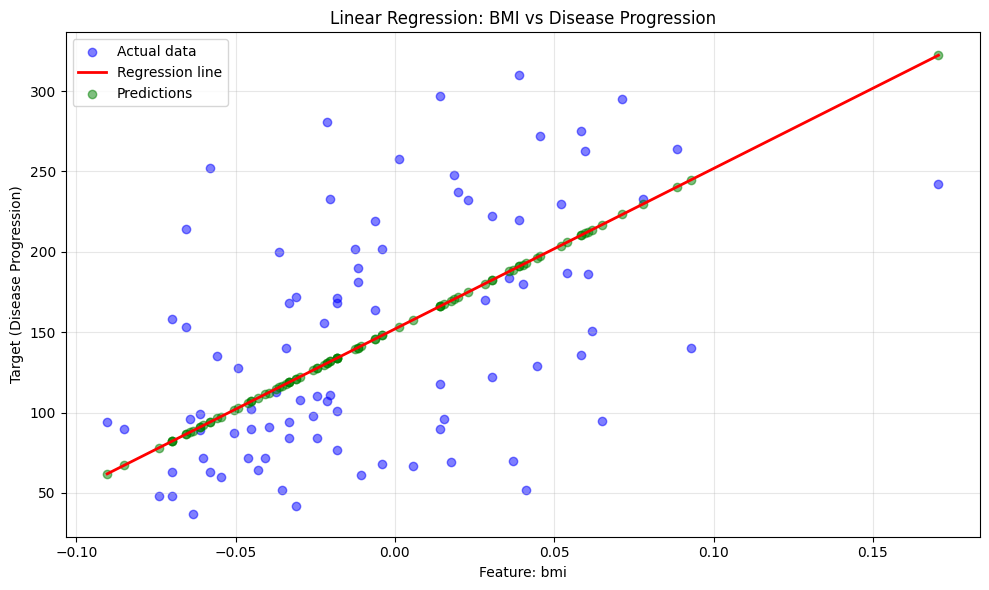

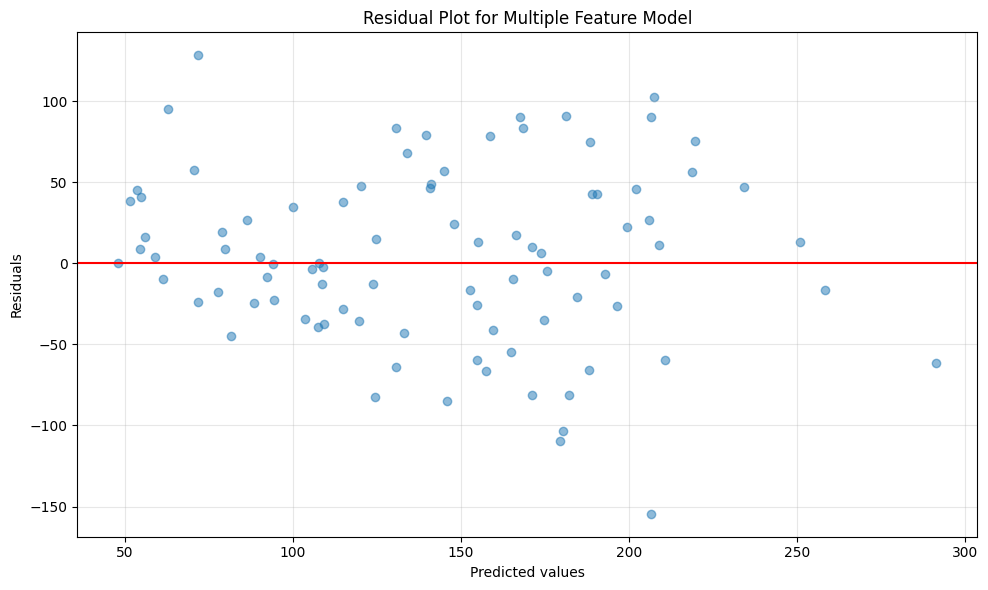

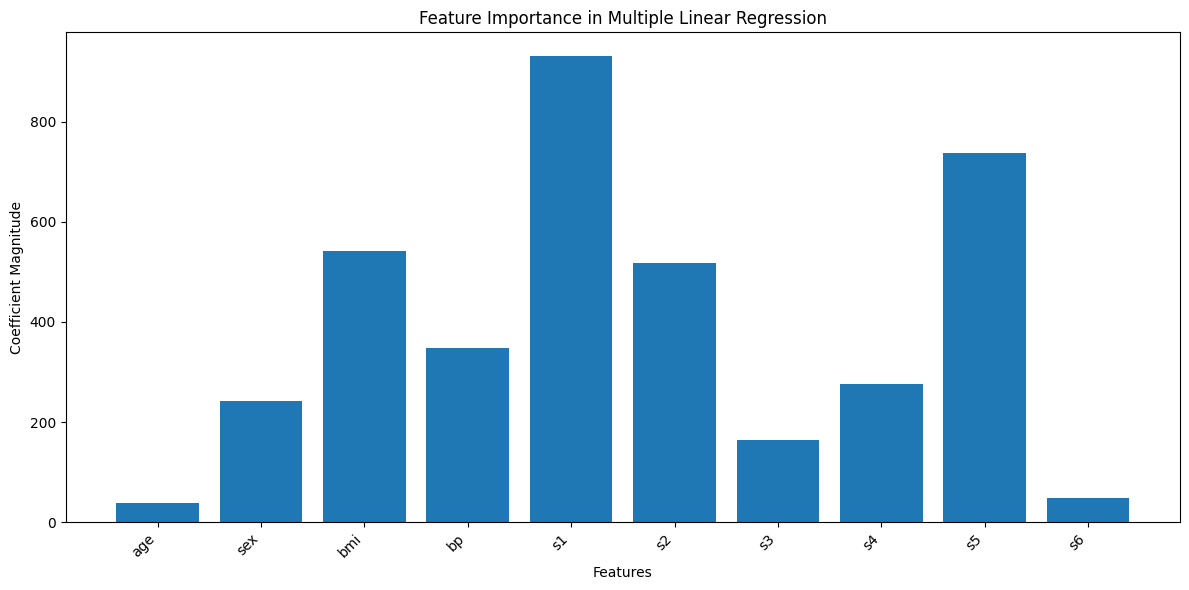

In [12]:
# Basic Linear Regression with Visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

print(f"Dataset shape: {X.shape}")
print(f"Feature names: {diabetes.feature_names}")

# For visualization purposes, let's use a single feature
feature_index = 2  # BMI feature
X_single_feature = X[:, feature_index].reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
    X_single_feature, y, test_size=0.2, random_state=42)

# Create and train the multi-feature linear regression model
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# Create and train the single-feature linear regression model
single_model = LinearRegression()
single_model.fit(X_train_single, y_train_single)

# Make predictions
y_pred_multi = multi_model.predict(X_test)
y_pred_single = single_model.predict(X_test_single)

# Evaluate the models
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

mse_single = mean_squared_error(y_test_single, y_pred_single)
r2_single = r2_score(y_test_single, y_pred_single)

print("\nMultiple Feature Model:")
print(f"Mean Squared Error: {mse_multi:.2f}")
print(f"R-squared: {r2_multi:.2f}")
print(f"Coefficients: {multi_model.coef_}")
print(f"Intercept: {multi_model.intercept_:.2f}")

print("\nSingle Feature Model (BMI):")
print(f"Mean Squared Error: {mse_single:.2f}")
print(f"R-squared: {r2_single:.2f}")
print(f"Coefficient: {single_model.coef_[0]:.2f}")

print(f"Intercept: {single_model.intercept_:.2f}")

# Visualize the single feature model
plt.figure(figsize=(10, 6))

# Plot the actual data points
plt.scatter(X_test_single, y_test_single, color='blue', alpha=0.5, label='Actual data')

# Plot the regression line
x_range = np.linspace(X_single_feature.min(), X_single_feature.max(), 100).reshape(-1, 1)
y_pred_range = single_model.predict(x_range)
plt.plot(x_range, y_pred_range, color='red', linewidth=2, label='Regression line')

# Add predicted values
plt.scatter(X_test_single, y_pred_single, color='green', alpha=0.5, label='Predictions')

# Add labels and title
plt.xlabel(f'Feature: {diabetes.feature_names[feature_index]}')
plt.ylabel('Target (Disease Progression)')
plt.title('Linear Regression: BMI vs Disease Progression')
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

# Residual Plot for the multi-feature model
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred_multi
plt.scatter(y_pred_multi, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Multiple Feature Model')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Feature importance plot
plt.figure(figsize=(12, 6))
importance = np.abs(multi_model.coef_)
features = diabetes.feature_names
plt.bar(features, importance)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance in Multiple Linear Regression')
plt.tight_layout()
plt.show()

# Exp7 Implement realtime data streaming and processing

In [18]:
!pip install basemap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.4/942.4 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.1
    Uninstalling pyproj-3.7.1:
      Successfully uninstalled pyproj-3.7.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalle

🛰️ 05:18:53 | ISS Location → Lat: -8.1054, Lon: -96.2329


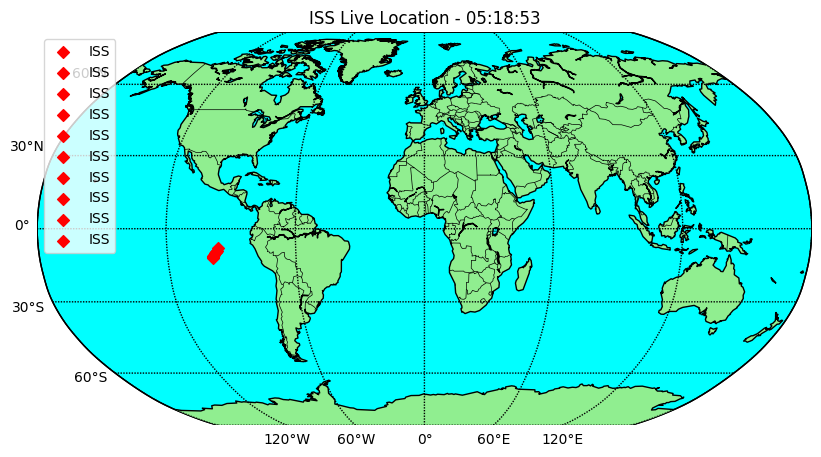

In [1]:
import requests
import time
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from IPython.display import clear_output

url = "http://api.open-notify.org/iss-now.json"

print("Tracking ISS live position:")

# Prepare map
plt.figure(figsize=(10, 6))
m = Basemap(projection='robin', resolution='c', lon_0=0)

# Set up plot
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgreen',lake_color='aqua')
m.drawparallels(range(-90, 91, 30), labels=[1,0,0,0])
m.drawmeridians(range(-180, 181, 60), labels=[0,0,0,1])

# Initialize position data
latitudes = []
longitudes = []

# Duration and Interval
duration = 60  # Run for 60 seconds
interval = 2   # Update every 2 seconds
start_time = time.time()

while (time.time() - start_time) < duration:
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        position = data['iss_position']
        timestamp = time.strftime('%H:%M:%S')
        lat = float(position['latitude'])
        lon = float(position['longitude'])

        # Store the positions for plotting
        latitudes.append(lat)
        longitudes.append(lon)

        # Clear output and update plot
        clear_output(wait=True)

        # Plot ISS position on the map
        x, y = m(lon, lat)
        m.scatter(x, y, color='red', marker='D', label="ISS", zorder=5)

        # Display the plot
        plt.title(f"ISS Live Location - {timestamp}")
        plt.legend(loc="upper left")
        plt.draw()

        print(f"🛰️ {timestamp} | ISS Location → Lat: {lat}, Lon: {lon}")
    else:
        print("Error:", response.status_code)

    time.sleep(interval)

plt.show()


# Exp8 AI API

In [10]:
from google import genai

client = genai.Client(api_key="your_key_here")

response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents="Explain how AI works in a few words",
)

print(response.text)

AI learns patterns from data to make predictions or decisions.

